# Sampling Data

In [1]:
from scipy.constants import c
import pymwm
params = {'core': {'shape': 'cylinder', 'size': 0.15,
                   'fill': {'RI': 1.333}},
          'clad': {'book': 'Au', 'page': 'Stewart-DLF'},
          'bounds': {'wl_max': 1.2, 'wl_min': 0.545,
                     'wl_imag': 6.0},  # conditions for use
          'modes': {'num_n': 6, 'num_m': 2, 'wl_min': 0.5, 'wl_max': 1.2,
                    'wl_imag': 6.0}}  # sampling setting for database
wg = pymwm.create(params)  # It takes hours for the first time

In [2]:
wg.alphas

{'h': [('E', 1, 1),
  ('E', 1, 2),
  ('E', 2, 1),
  ('E', 3, 1),
  ('E', 4, 1),
  ('M', 0, 1),
  ('M', 1, 1)],
 'v': [('E', 0, 1),
  ('E', 1, 1),
  ('E', 1, 2),
  ('E', 2, 1),
  ('E', 3, 1),
  ('E', 4, 1),
  ('M', 1, 1)]}

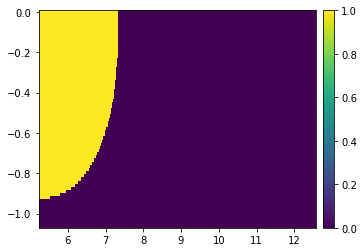

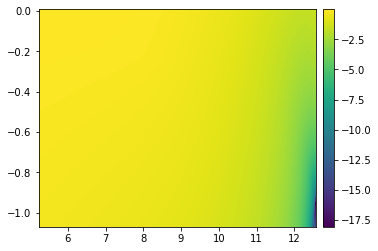

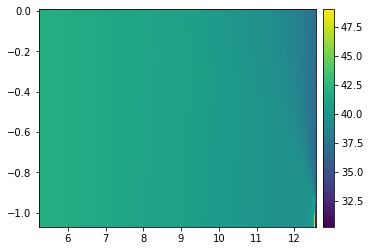

In [3]:
betas, convs, samples = wg.betas_convs_samples(params)
samples.plot_convs(convs, ('M', 3, 1))
samples.plot_real_betas(betas, ('M', 3, 1))
samples.plot_imag_betas(betas, ('M', 3, 1))


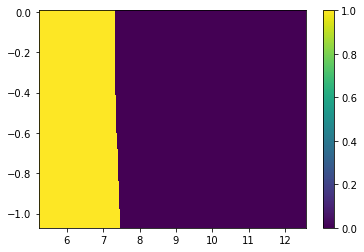

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x, y = np.meshgrid(samples.ws, samples.wis, indexing='ij')
ws = x + 1j * y
es = np.array([samples.clad(w) for w in ws.ravel()]).reshape(ws.shape)
vs = samples.v(betas[('M', 3, 1)] ** 2, ws, es)
plt.pcolormesh(x, y, np.abs(vs.real) > np.abs(vs.imag), shading="auto", rasterized=True)
plt.colorbar()
plt.show()
